## EDA

This notebook accomplishes the following:
* Evaluates pairwise relationships between all features
* Investigates the features within macro and equity styles categories

In [8]:
import numpy as np
import pandas as pd
import openpyxl
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# load dataframes from pickle file
with open('data_clean.pkl', 'rb') as f:
    saved = pickle.load(f)
    price_df = saved['price_df']
    return_df = saved['return_df']
    category_map = saved['category_mapping']


In [4]:
# looking at returns as it will be our main focus for our project
return_df.head()

,us_dollar,commodities,us_equity,value,small_cap,low_vol,credit,interest_rate,long_vol,momentum,inflation,bitcoin,quality,trend,equity,em_equity
date,,,,,,,,,,,,,,,,
2015-05-01,0.007651,-0.003950,0.010562,0.008450,0.006205,0.007597,-0.000170,-0.012842,-0.135989,0.016890,-0.009783,-0.010498,0.014540,0.005873,0.005056,-0.001684
2015-05-04,0.002041,0.000463,0.003016,0.004505,0.003037,0.003479,0.000623,-0.008929,0.011742,0.002671,-0.003986,0.015548,0.001143,0.002962,0.002135,0.002231
2015-05-05,-0.004559,0.014689,-0.011888,-0.010159,-0.011492,-0.012564,0.000226,-0.001959,0.107615,-0.015870,0.013180,-0.015229,-0.010659,-0.009874,-0.009612,-0.000228
2015-05-06,-0.010851,0.000822,-0.003583,-0.003846,0.002169,-0.002760,-0.001189,-0.015421,0.057042,-0.000690,-0.007915,0.002554,-0.002461,-0.009081,-0.000062,-0.007123
2015-05-07,0.006034,-0.021568,0.004026,0.001870,0.004883,0.006183,-0.000359,0.011479,-0.001321,0.008361,-0.017738,0.006991,0.005120,-0.001810,-0.001627,-0.014961


In [13]:
print("Column Names:",return_df.columns)
print("\nCategories of Assets:", category_map)

Column Names: Index(['us_dollar', 'commodities', 'us_equity', 'value', 'small_cap',
       'low_vol', 'credit', 'interest_rate', 'long_vol', 'momentum',
       'inflation', 'bitcoin', 'quality', 'trend', 'equity', 'em_equity'],
      dtype='object')

Categories of Assets: {'core_macro': ['commodities', 'credit', 'interest_rate', 'equity'], 'secondary_macro': ['us_dollar', 'us_equity', 'inflation', 'bitcoin', 'em_equity'], 'macro_styles': ['trend', 'long_vol'], 'equity_styles': ['value', 'small_cap', 'low_vol', 'momentum', 'quality']}


In [ ]:
# if plotting everythign at once:

# # define the target categories
# target_cat = {"macro_styles", "equity_styles"}

# # create list of col names in target categories
# col_in_categories = []
# for cat in target_cat:
#     feature_list = category_map.get(cat)
#     for item in feature_list:
#         col_in_categories.append(item)

# # plot only features of interest
# for col in col_in_categories:
#     if col in return_df.columns:
#         sns.histplot(return_df[col], kde=True)
#         plt.title(f"Distribution of {col}")
#         plt.tight_layout()
#         plt.show()


Macro Styles Features:


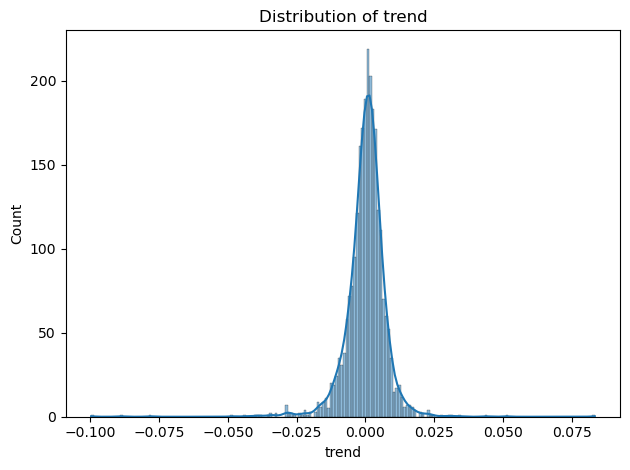

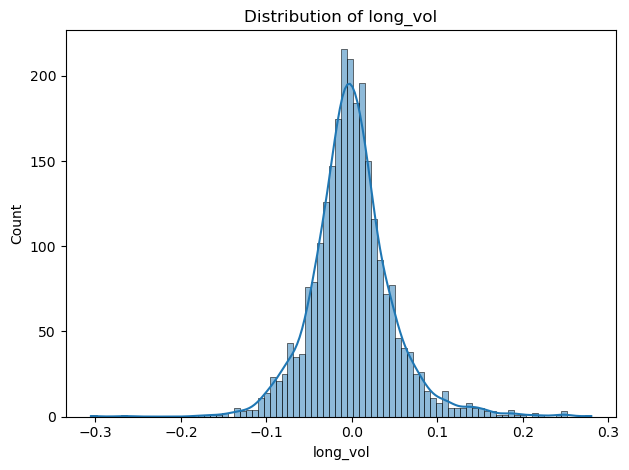

--------------------------------------------------------------------------------
Equity Styles Features:


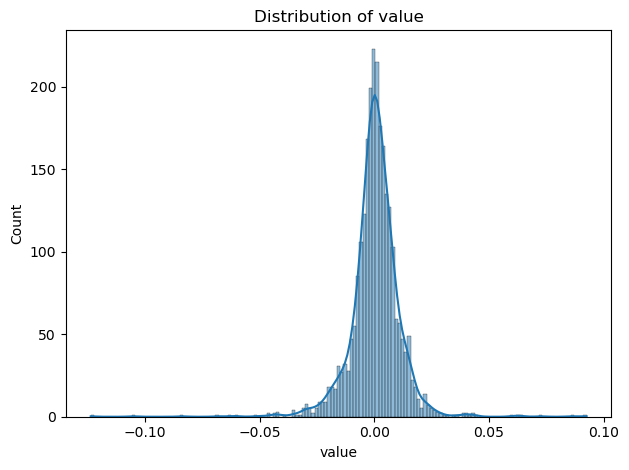

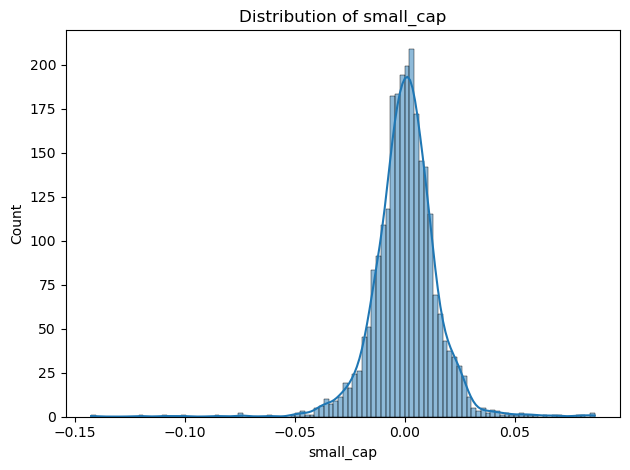

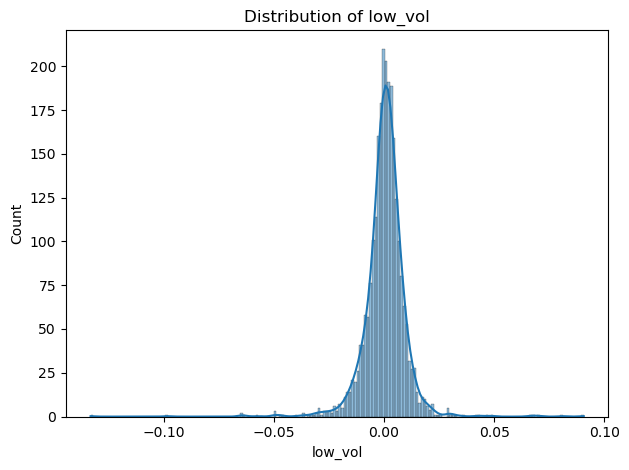

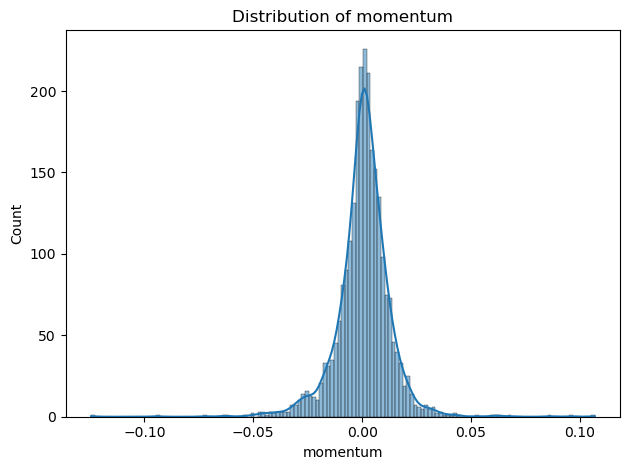

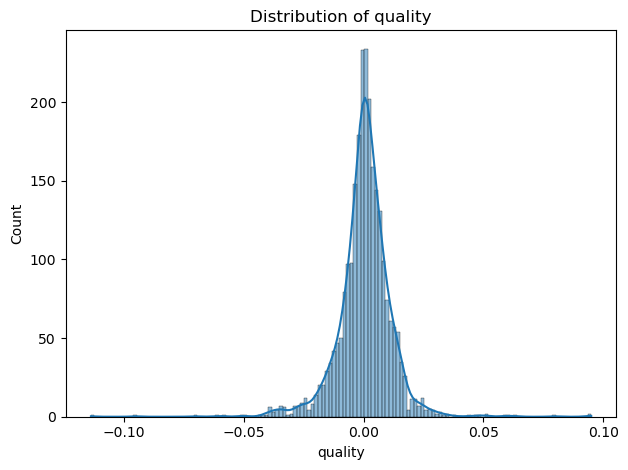

In [20]:
## Histogram of features

print("Macro Styles Features:")

# Macro_style Features
# get list of features in category
macro_styles_feats = []
for item in category_map.get("macro_styles"):
        macro_styles_feats.append(item)

# plot features in category
for feat in macro_styles_feats:
    if feat in return_df.columns:
        sns.histplot(return_df[feat], kde=True)
        plt.title(f"Distribution of {feat}")
        plt.tight_layout()
        plt.show()

print('-' * 80)
print("Equity Styles Features:")

# Equity_style Features
# get list of features in category
equity_styles_feats = []
for item in category_map.get("equity_styles"):
        equity_styles_feats.append(item)

# plot features in category
for feat in equity_styles_feats:
    if feat in return_df.columns:
        sns.histplot(return_df[feat], kde=True)
        plt.title(f"Distribution of {feat}")
        plt.tight_layout()
        plt.show()

Enter commentary about data above

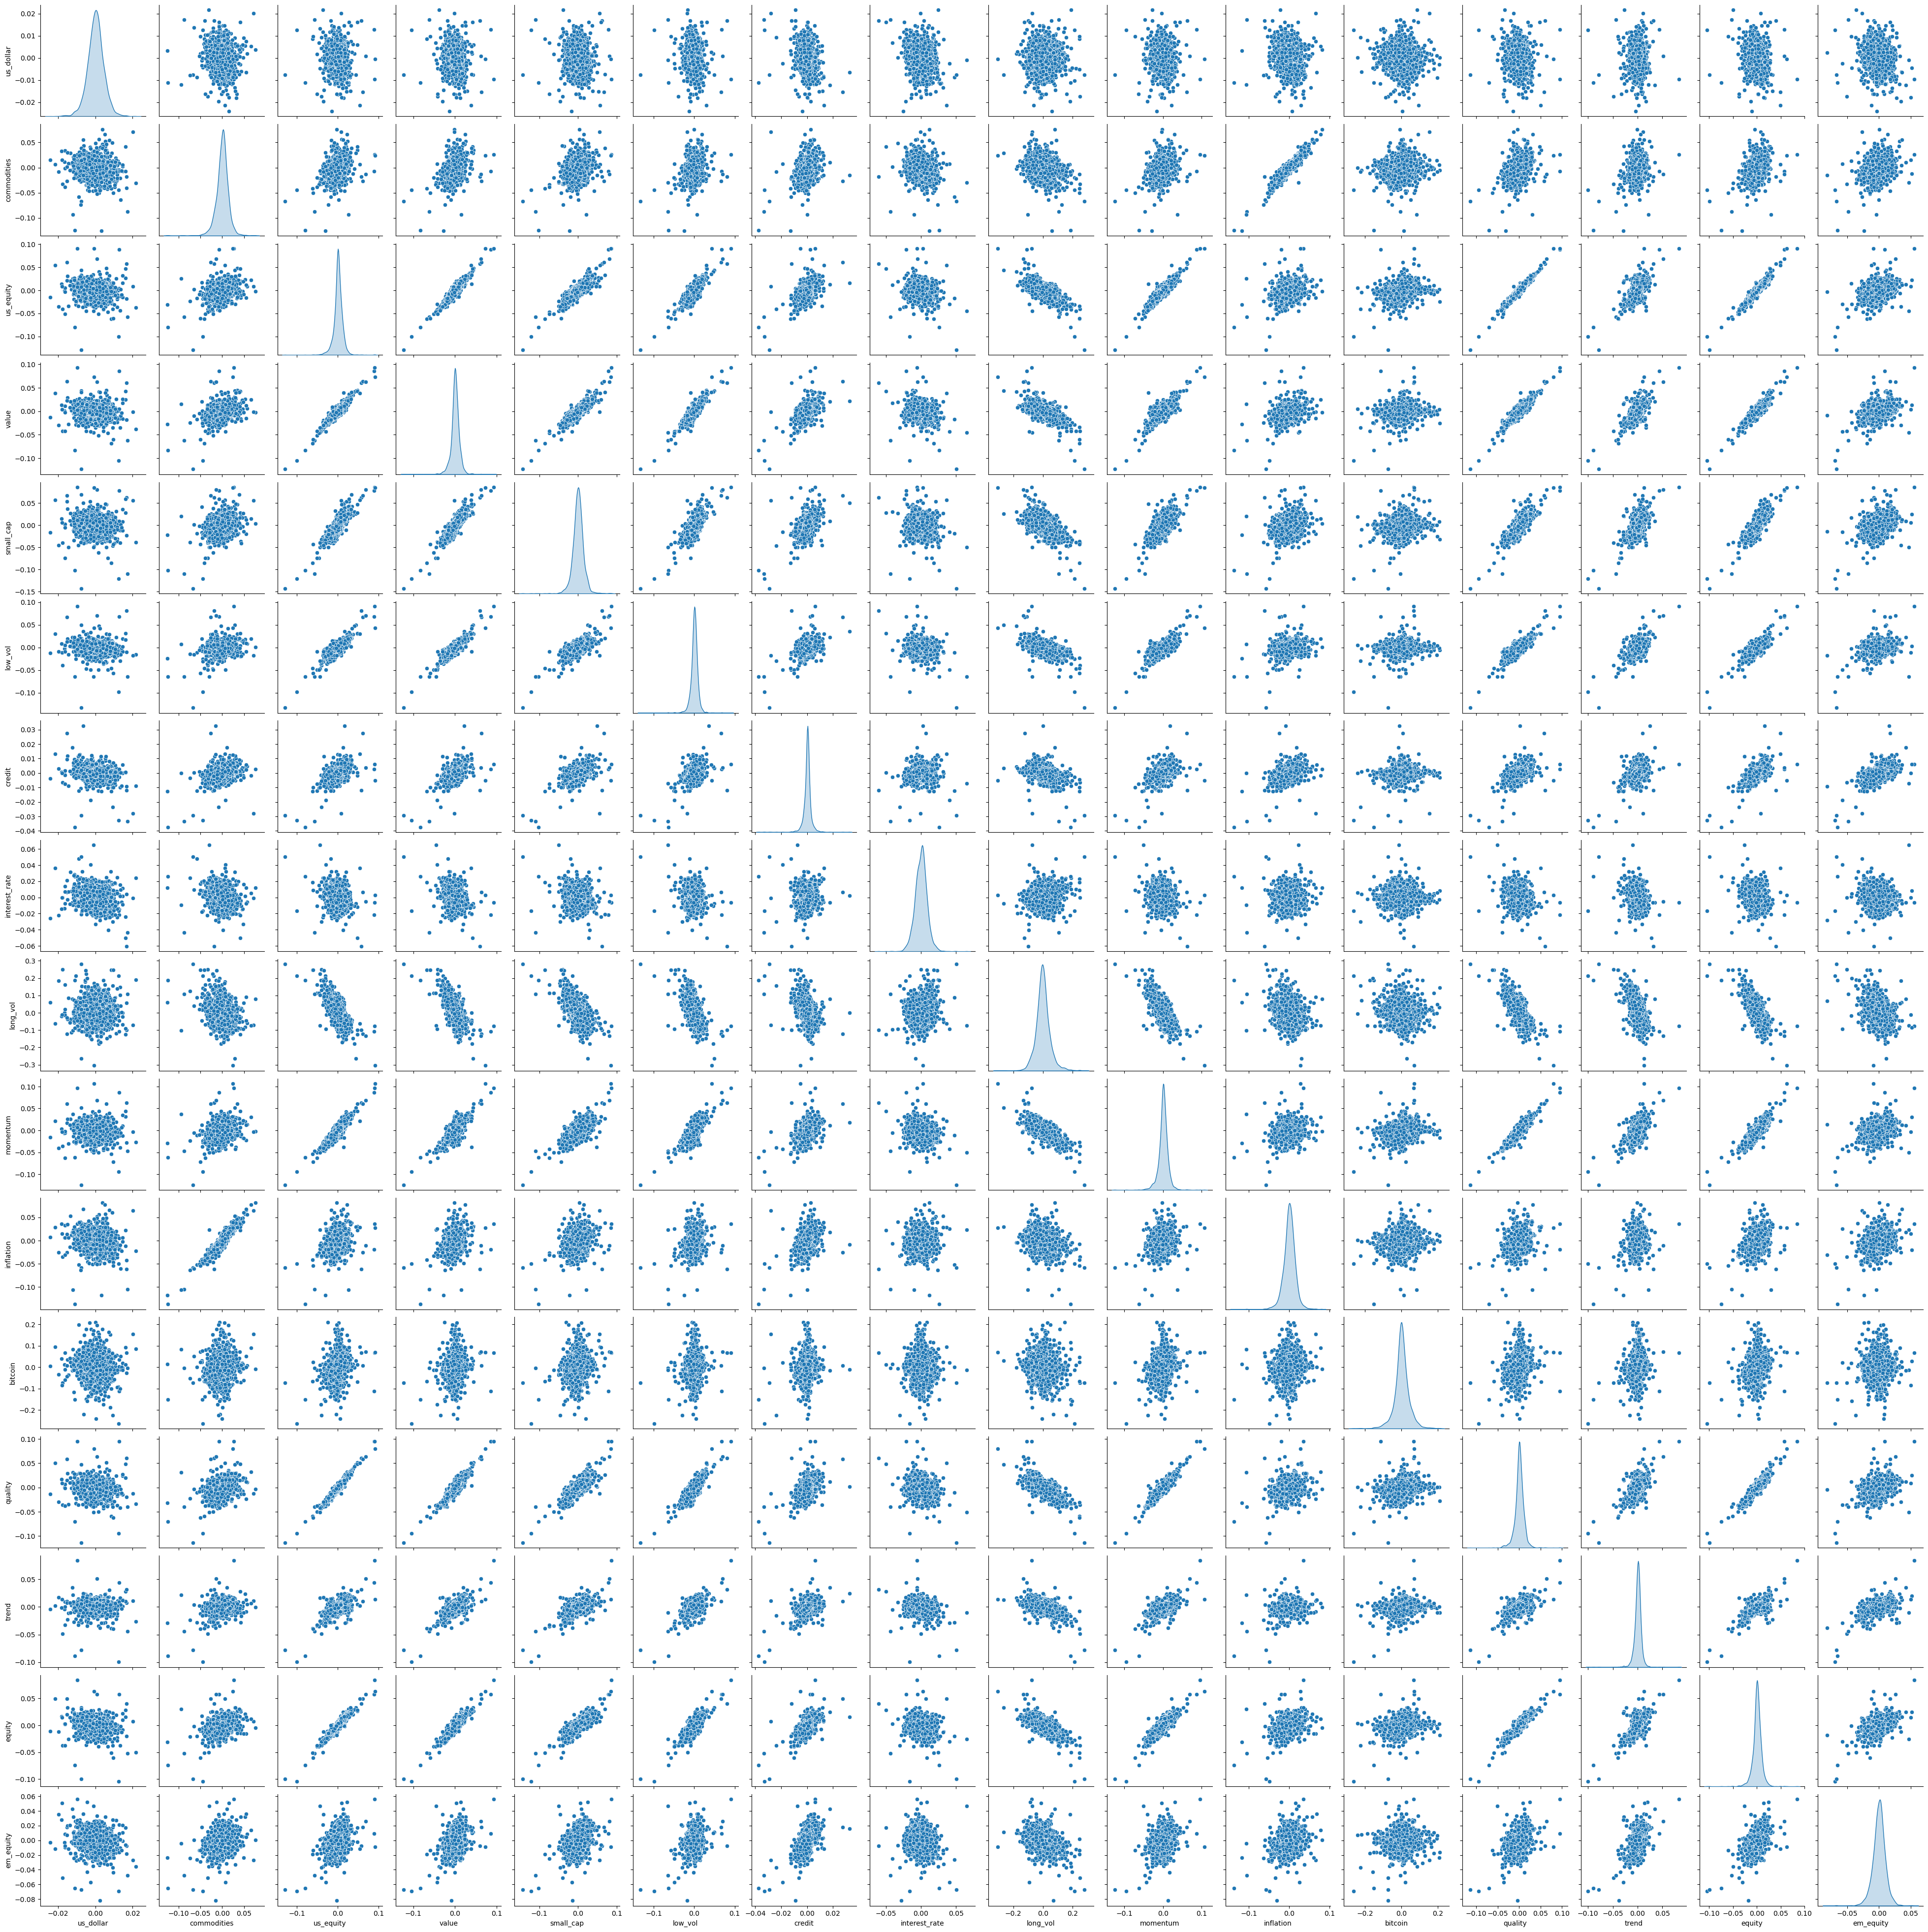

In [22]:
sns.pairplot(return_df, diag_kind='kde')